In [57]:
# thêm thư viện
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf

In [51]:
import os

new_dir = r"D:\University\DataViz\Proj\Lab\DataViz_Lab02"

os.chdir(new_dir)

print(os.getcwd())

D:\University\DataViz\Proj\Lab\DataViz_Lab02


In [52]:
def plot_price_over_time_for_stock(df, stock_code):
    """
    Vẽ biểu đồ giá theo thời gian cho mã cổ phiếu cụ thể
    với nhãn trục x không bị chồng lấn.
    
    Args:
    - df: DataFrame chứa dữ liệu.
    - stock_code: Mã cổ phiếu cần vẽ biểu đồ.
    """
    # Đảm bảo cột Date ở định dạng datetime và là index
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)

    # Lọc dữ liệu theo mã cổ phiếu
    stock_data = df[df['XSTC'] == stock_code]

    # Nếu không có dữ liệu cho mã cổ phiếu, hiển thị thông báo và thoát khỏi hàm
    if stock_data.empty:
        print(f"Không tìm thấy dữ liệu cho mã cổ phiếu: {stock_code}")
        return

    # Tạo biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Price'], label=stock_code)

    # Format nhãn trục x để không chồng lấn
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Hiển thị nhãn mỗi 2 tháng

    # Xoay nhãn và căn chỉnh để tránh bị chồng lấn
    plt.xticks(rotation=45, ha='right')

    # Cài đặt các thông tin cơ bản của biểu đồ
    plt.xlabel('Date')
    plt.ylabel('Price (VND)')
    plt.title(f'Price Over Time for {stock_code}')
    plt.legend()

    # Đảm bảo biểu đồ vừa vặn với khung hiển thị
    plt.tight_layout()
    plt.show()

In [53]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('Data/merged_data.csv')
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %,XSTC
0,2018-06-05,3592.5,3523.6,3631.8,3425.1,140590.0,4.89,AGR
1,2018-06-06,3612.1,3592.5,3631.8,3543.2,113340.0,0.55,AGR
2,2018-06-07,3641.7,3641.7,3651.5,3592.5,75800.0,0.82,AGR
3,2018-06-08,3562.9,3641.7,3641.7,3543.2,118030.0,-2.16,AGR
4,2018-06-11,3533.4,3562.9,3562.9,3444.8,82080.0,-0.83,AGR


In [54]:
# set Date là index
data.set_index('Date', inplace = True)
data.head(5)

,Price,Open,High,Low,Vol.,Change %,XSTC
Date,,,,,,,
2018-06-05,3592.5,3523.6,3631.8,3425.1,140590.0,4.89,AGR
2018-06-06,3612.1,3592.5,3631.8,3543.2,113340.0,0.55,AGR
2018-06-07,3641.7,3641.7,3651.5,3592.5,75800.0,0.82,AGR
2018-06-08,3562.9,3641.7,3641.7,3543.2,118030.0,-2.16,AGR
2018-06-11,3533.4,3562.9,3562.9,3444.8,82080.0,-0.83,AGR


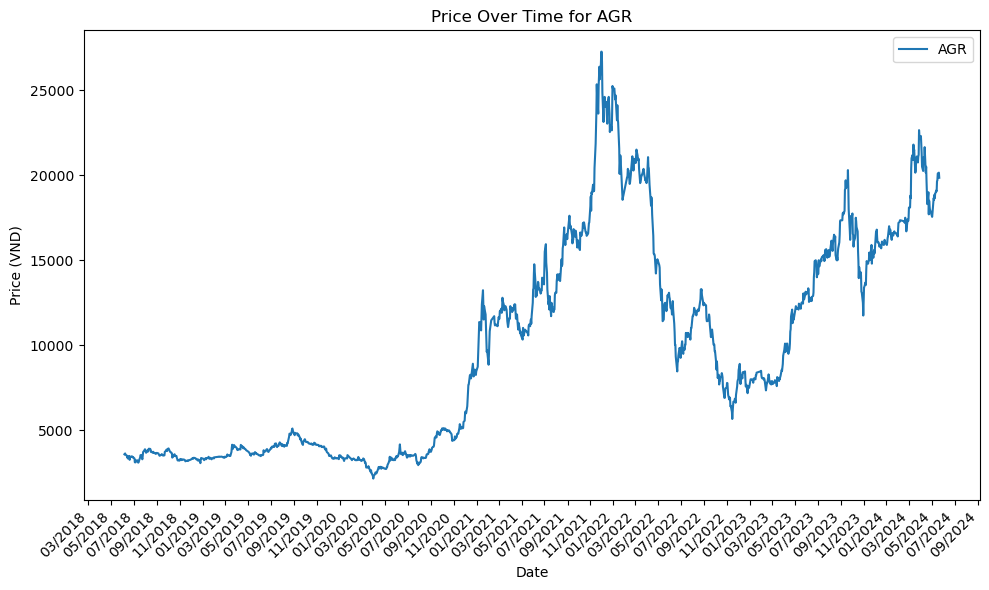

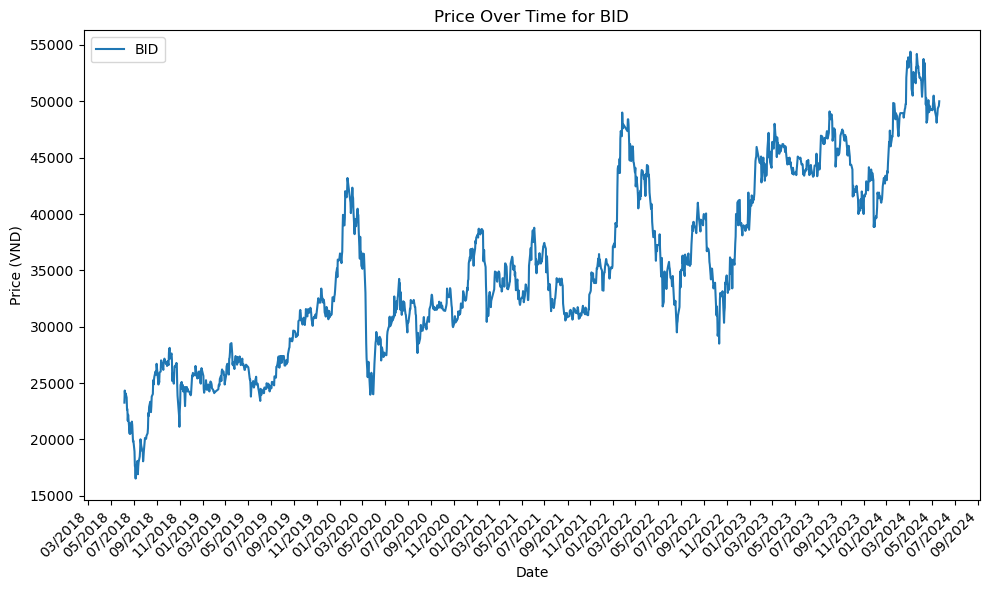

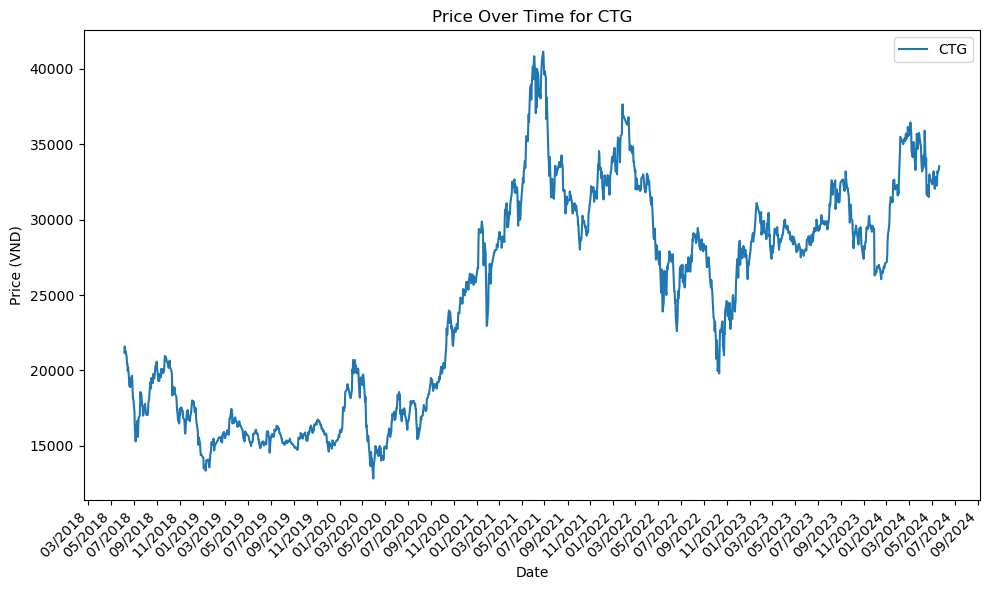

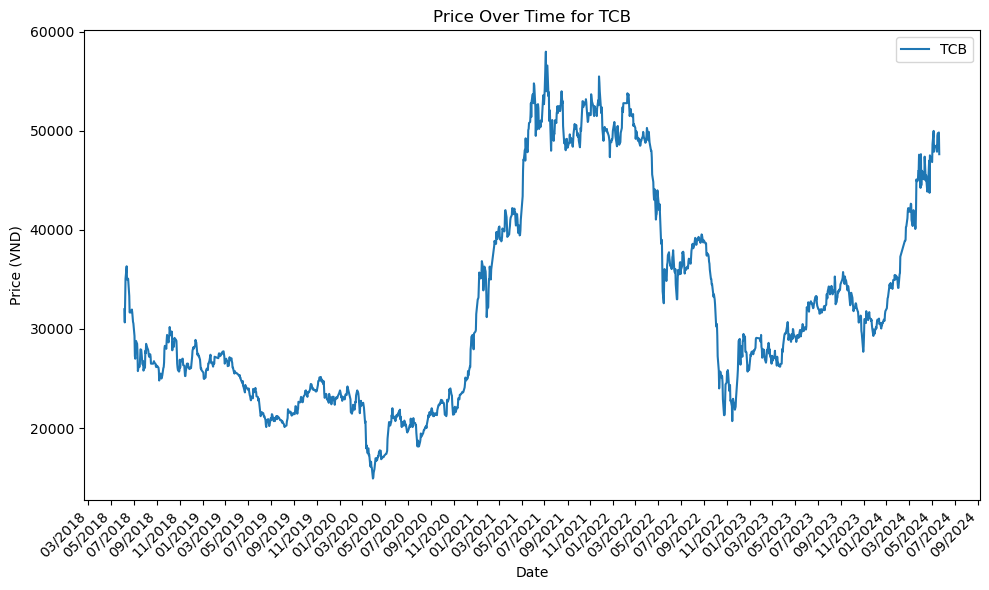

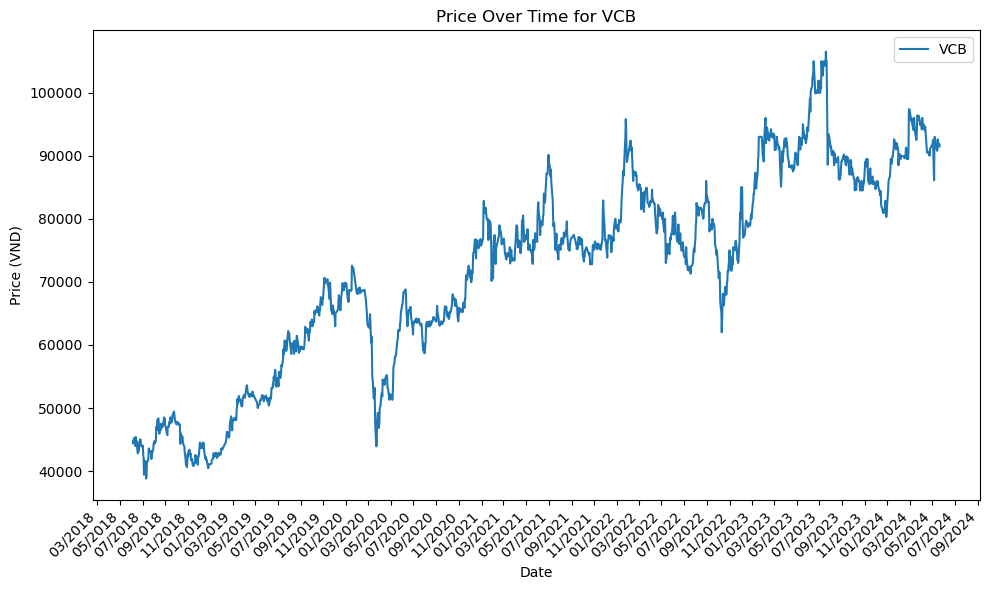

In [55]:
# Lấy danh sách các mã cổ phiếu duy nhất trong dữ liệu
unique_stock_codes = data['XSTC'].unique()

# Vẽ biểu đồ cho từng mã cổ phiếu
for code in unique_stock_codes:
    plot_price_over_time_for_stock(data, code)

In [59]:
def plot_candlestick_chart(df, stock_code):
    """
    Vẽ biểu đồ nến cho mã cổ phiếu cụ thể.
    
    Args:
    - df: DataFrame chứa dữ liệu đã được định dạng đúng.
    - stock_code: Mã cổ phiếu cần vẽ biểu đồ.
    """
    # Lọc dữ liệu theo mã cổ phiếu
    stock_data = df[df['XSTC'] == stock_code]
    
    # Nếu không có dữ liệu cho mã cổ phiếu, hiển thị thông báo và thoát khỏi hàm
    if stock_data.empty:
        print(f"Không tìm thấy dữ liệu cho mã cổ phiếu: {stock_code}")
        return

    # # Đảm bảo index là cột Date và là kiểu datetime
    # stock_data = stock_data.set_index('Date')
    
    # # Đảm bảo dữ liệu đầu vào cho mplfinance
    # stock_data.index = pd.to_datetime(stock_data.index)

    # Vẽ biểu đồ nến
    mpf.plot(stock_data, type='candle', style='charles',
             title=f'Candlestick Chart for {stock_code}',
             ylabel='Price (VND)',
             volume=False, figratio=(12,8), mav=(3,6,9))

In [60]:
# Vẽ biểu đồ cho từng mã cổ phiếu
for code in unique_stock_codes:
    plot_candlestick_chart(data, code)

ValueError: Column "Close" NOT FOUND in Input DataFrame!
            CHECK that your column names are correct AND/OR
            CHECK for leading or trailing blanks in your column names.